## Utilizando Técnica Não Supervisionada - Clusterização

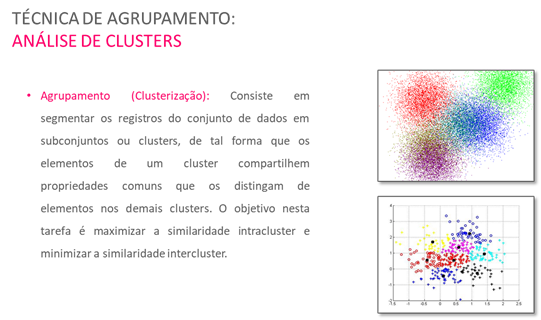

In [1]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
 

# import required libraries for clustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from collections import Counter


    Objetivo: Criar uma segmentação de países utilizando os recordes femininos da modalidade esportiva de corridas. Para o desenvolvimento do modelo foi utilizada uma base disponível no site da universidade de Wisconsin através do endereço: http://www.stat.wisc.edu/~rich/JWMULT06dat/T1-9.dat.
    Nesta base temos os recordes femininos internacionais, referência 2005, das seguintes modalidades: 100 metros em segundos, 200 metros em segundos, 400 metros em segundos, 800 metros em minutos, 1.500 metros em minutos, 3.000 metros em minutos e maratona em minutos. 
    Vamos iniciar a análise seguindo as etapas de mineração de dados. Tendo como foco a segmentação de países a partir dos resultados nas provas de corrida.  Vale ressaltar que não temos uma variável target, queremos obter agrupamentos de países com características homogêneas. A técnica vai nos ajudar, a realizar esses agrupamentos, apontando a quantidade de grupos e quais as características de cada grupo. 
    Primeiramente fizemos o download dos dados salvando em um diretório. É o nosso primeiro contato com essa base de análise, então precisamos nos familiarizar com o conteúdo dela. 
    Aqui a base foi renomeada para “Base_Paises”. 


In [3]:
# Ler arquivo csv - lendo o conjunto de dados usando a função read_csv() dos Pandas.

dados = pd.read_csv(R"Base_Paises.csv", sep=";")

print("Total number of transactions: "+ str(dados.shape[0]))
dados.head(5)


Total number of transactions: 54


,PAIS,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
0,ARG,11.57,22.94,52.50,2.05,4.25,9.19,150.32
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51
2,AUT,11.15,22.70,50.62,1.94,4.05,8.78,154.35
3,BEL,11.14,22.48,51.45,1.97,4.08,8.82,143.05
4,BER,11.46,23.05,53.30,2.07,4.29,9.81,174.18


In [4]:
# número de observações faltantes no dataset para cada variável
dados.isnull().sum()

PAIS       0
p100ms     0
p200ms     0
p400ms     0
p800mm     0
p1500mm    0
p3000mm    0
pmaratm    0
dtype: int64

In [5]:
#Estatisticas descritivas
dados.describe()

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,11.357778,23.118519,51.989074,2.022407,4.189444,9.080741,153.619259
std,0.394101,0.929025,2.597202,0.086873,0.272365,0.815327,16.439895
min,10.490000,21.340000,47.600000,1.890000,3.840000,8.100000,135.250000
25%,11.122500,22.570000,49.967500,1.970000,4.002500,8.542500,143.480000
50%,11.325000,22.980000,51.645000,2.005000,4.100000,8.845000,148.430000
75%,11.567500,23.610000,53.117500,2.070000,4.337500,9.325000,157.665000
max,12.520000,25.910000,61.650000,2.290000,5.420000,13.120000,221.140000


In [6]:
#Verificando o formato das variaveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PAIS     54 non-null     object 
 1   p100ms   54 non-null     float64
 2   p200ms   54 non-null     float64
 3   p400ms   54 non-null     float64
 4   p800mm   54 non-null     float64
 5   p1500mm  54 non-null     float64
 6   p3000mm  54 non-null     float64
 7   pmaratm  54 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


In [7]:
print(dados)

     PAIS  p100ms  p200ms  p400ms  p800mm  p1500mm  p3000mm  pmaratm
0     ARG   11.57   22.94   52.50    2.05     4.25     9.19   150.32
1     AUS   11.12   22.23   48.63    1.98     4.02     8.63   143.51
2     AUT   11.15   22.70   50.62    1.94     4.05     8.78   154.35
3     BEL   11.14   22.48   51.45    1.97     4.08     8.82   143.05
4     BER   11.46   23.05   53.30    2.07     4.29     9.81   174.18
5     BRA   11.17   22.60   50.62    1.97     4.17     9.04   147.41
6     CAN   10.98   22.62   49.91    1.97     4.00     8.54   148.36
7     CHI   11.65   23.84   53.68    2.00     4.22     9.26   152.23
8     CHN   10.79   22.01   49.81    1.93     3.84     8.10   139.39
9     COL   11.31   22.92   49.64    2.04     4.34     9.37   155.19
10    COK   12.52   25.91   61.65    2.28     4.82    11.10   212.33
11    CRC   11.72   23.92   52.57    2.10     4.52     9.84   164.33
12    CZE   11.09   21.97   47.99    1.89     4.03     8.87   145.19
13    DEN   11.42   23.36   52.92 

Text(0, 0.5, 'Número de casos')

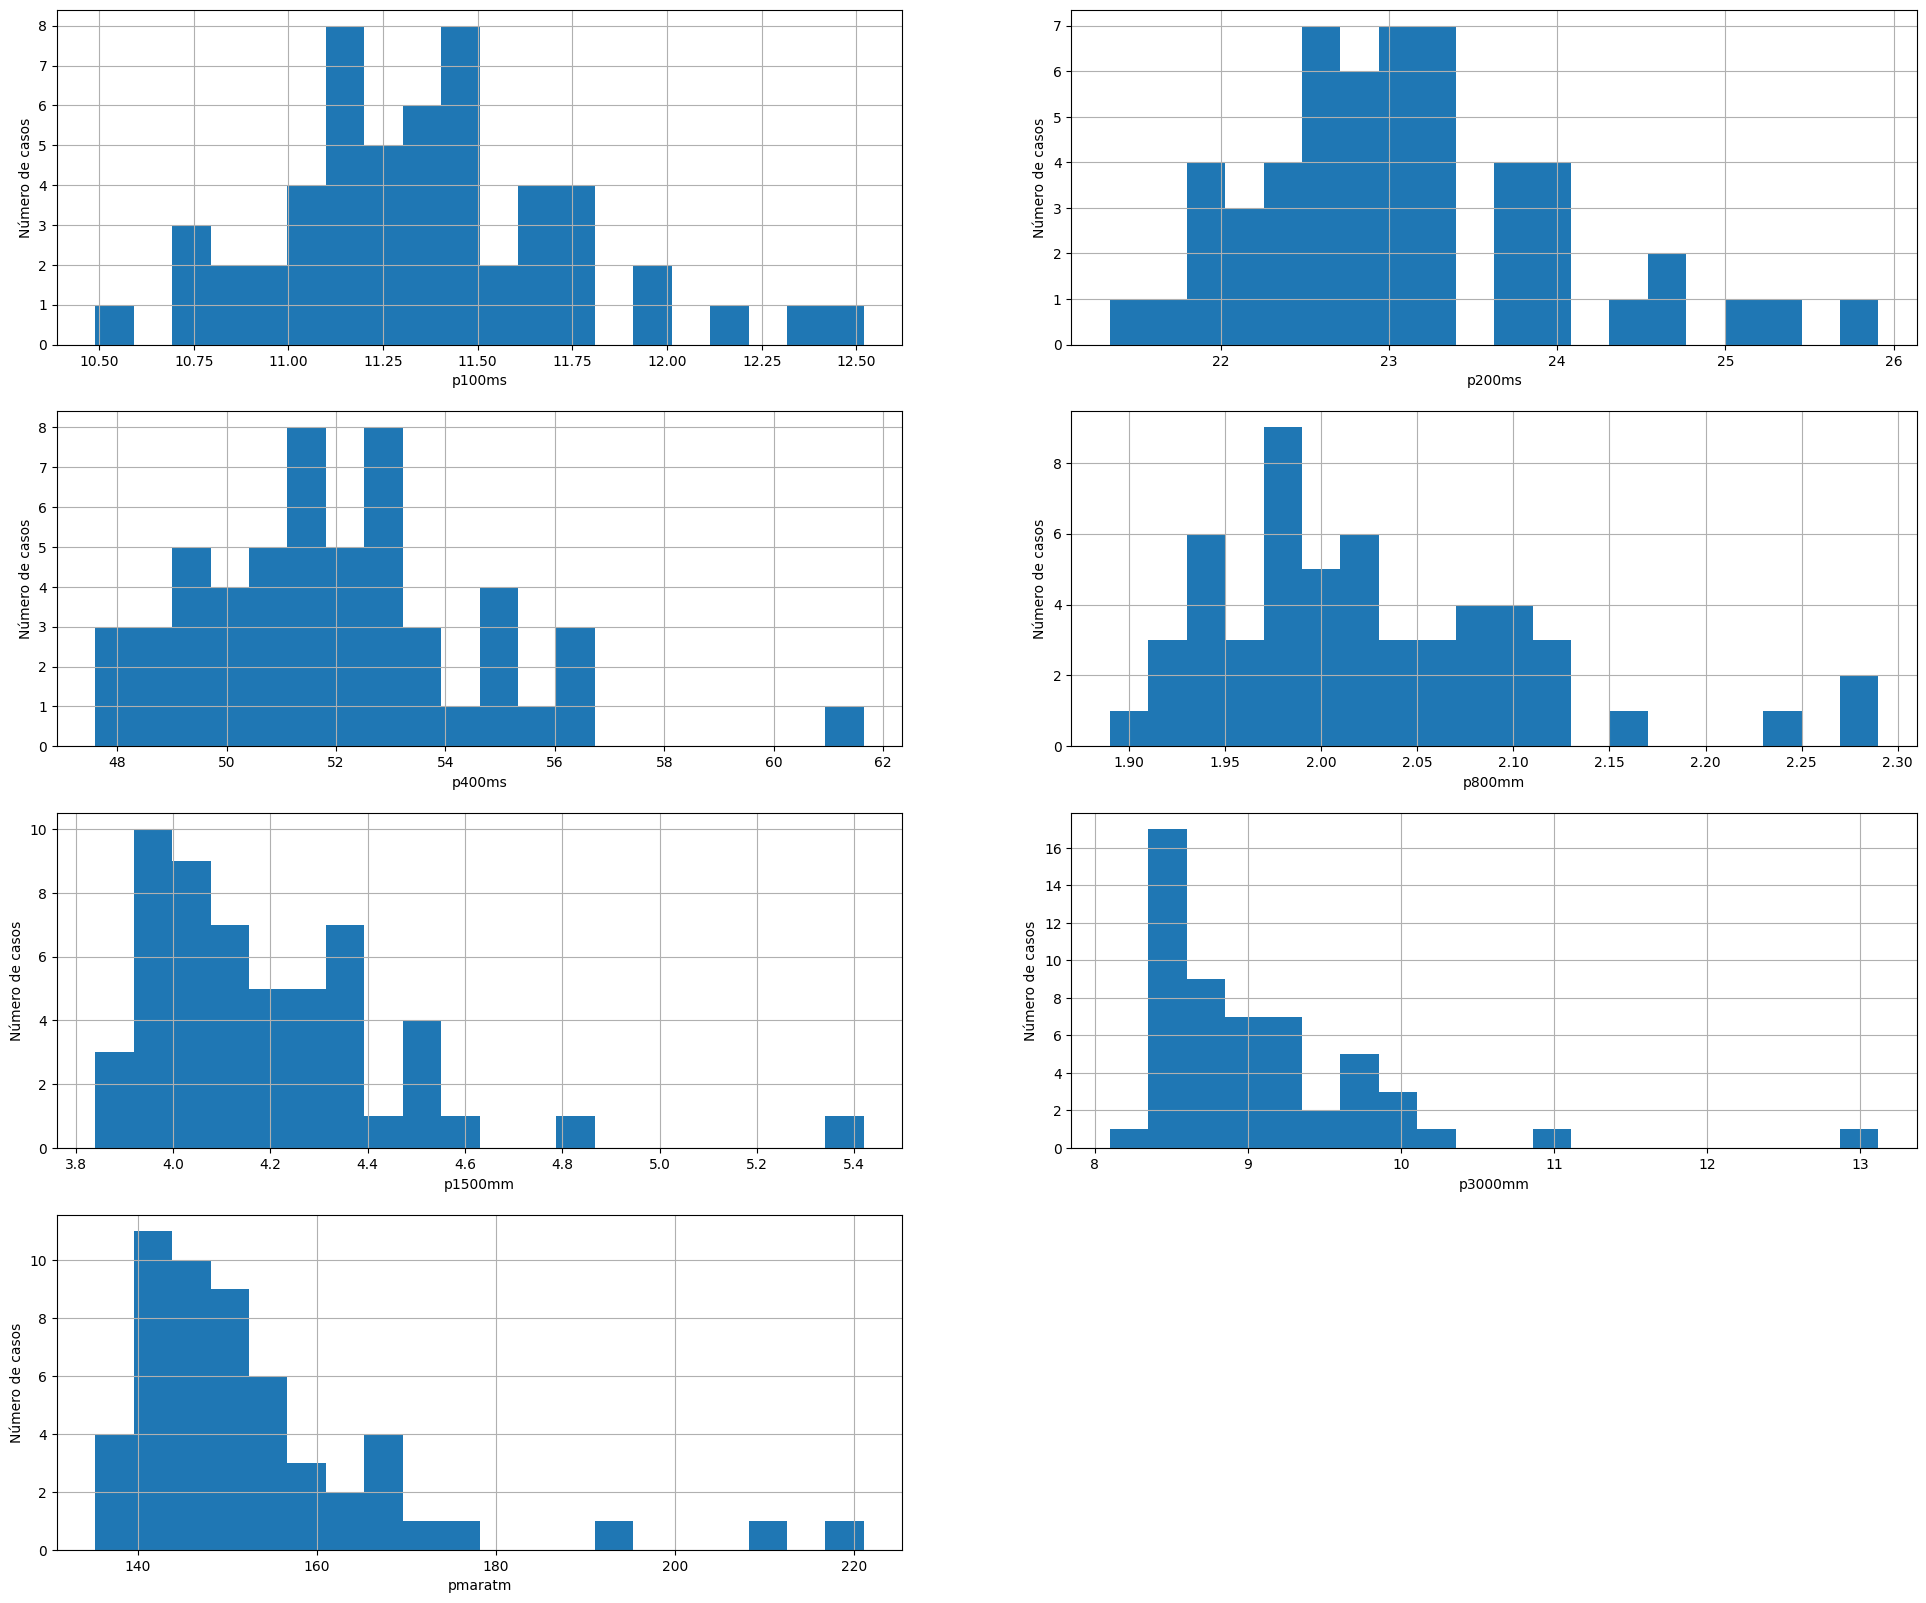

In [8]:
# avaliando a distribuicaoo de cada variavel

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados['p100ms'].hist(bins=20)
fig.set_xlabel('p100ms')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 2)
fig = dados['p200ms'].hist(bins=20)
fig.set_xlabel('p200ms')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 3)
fig = dados['p400ms'].hist(bins=20)
fig.set_xlabel('p400ms')
fig.set_ylabel('Número de casos')



plt.subplot(4, 2, 4)
fig = dados['p800mm'].hist(bins=20)
fig.set_xlabel('p800mm')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 5)
fig = dados['p1500mm'].hist(bins=20)
fig.set_xlabel('p1500mm')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = dados['p3000mm'].hist(bins=20)
fig.set_xlabel('p3000mm')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = dados['pmaratm'].hist(bins=20)
fig.set_xlabel('pmaratm')
fig.set_ylabel('Número de casos')



Text(0, 0.5, 'pmaratm')

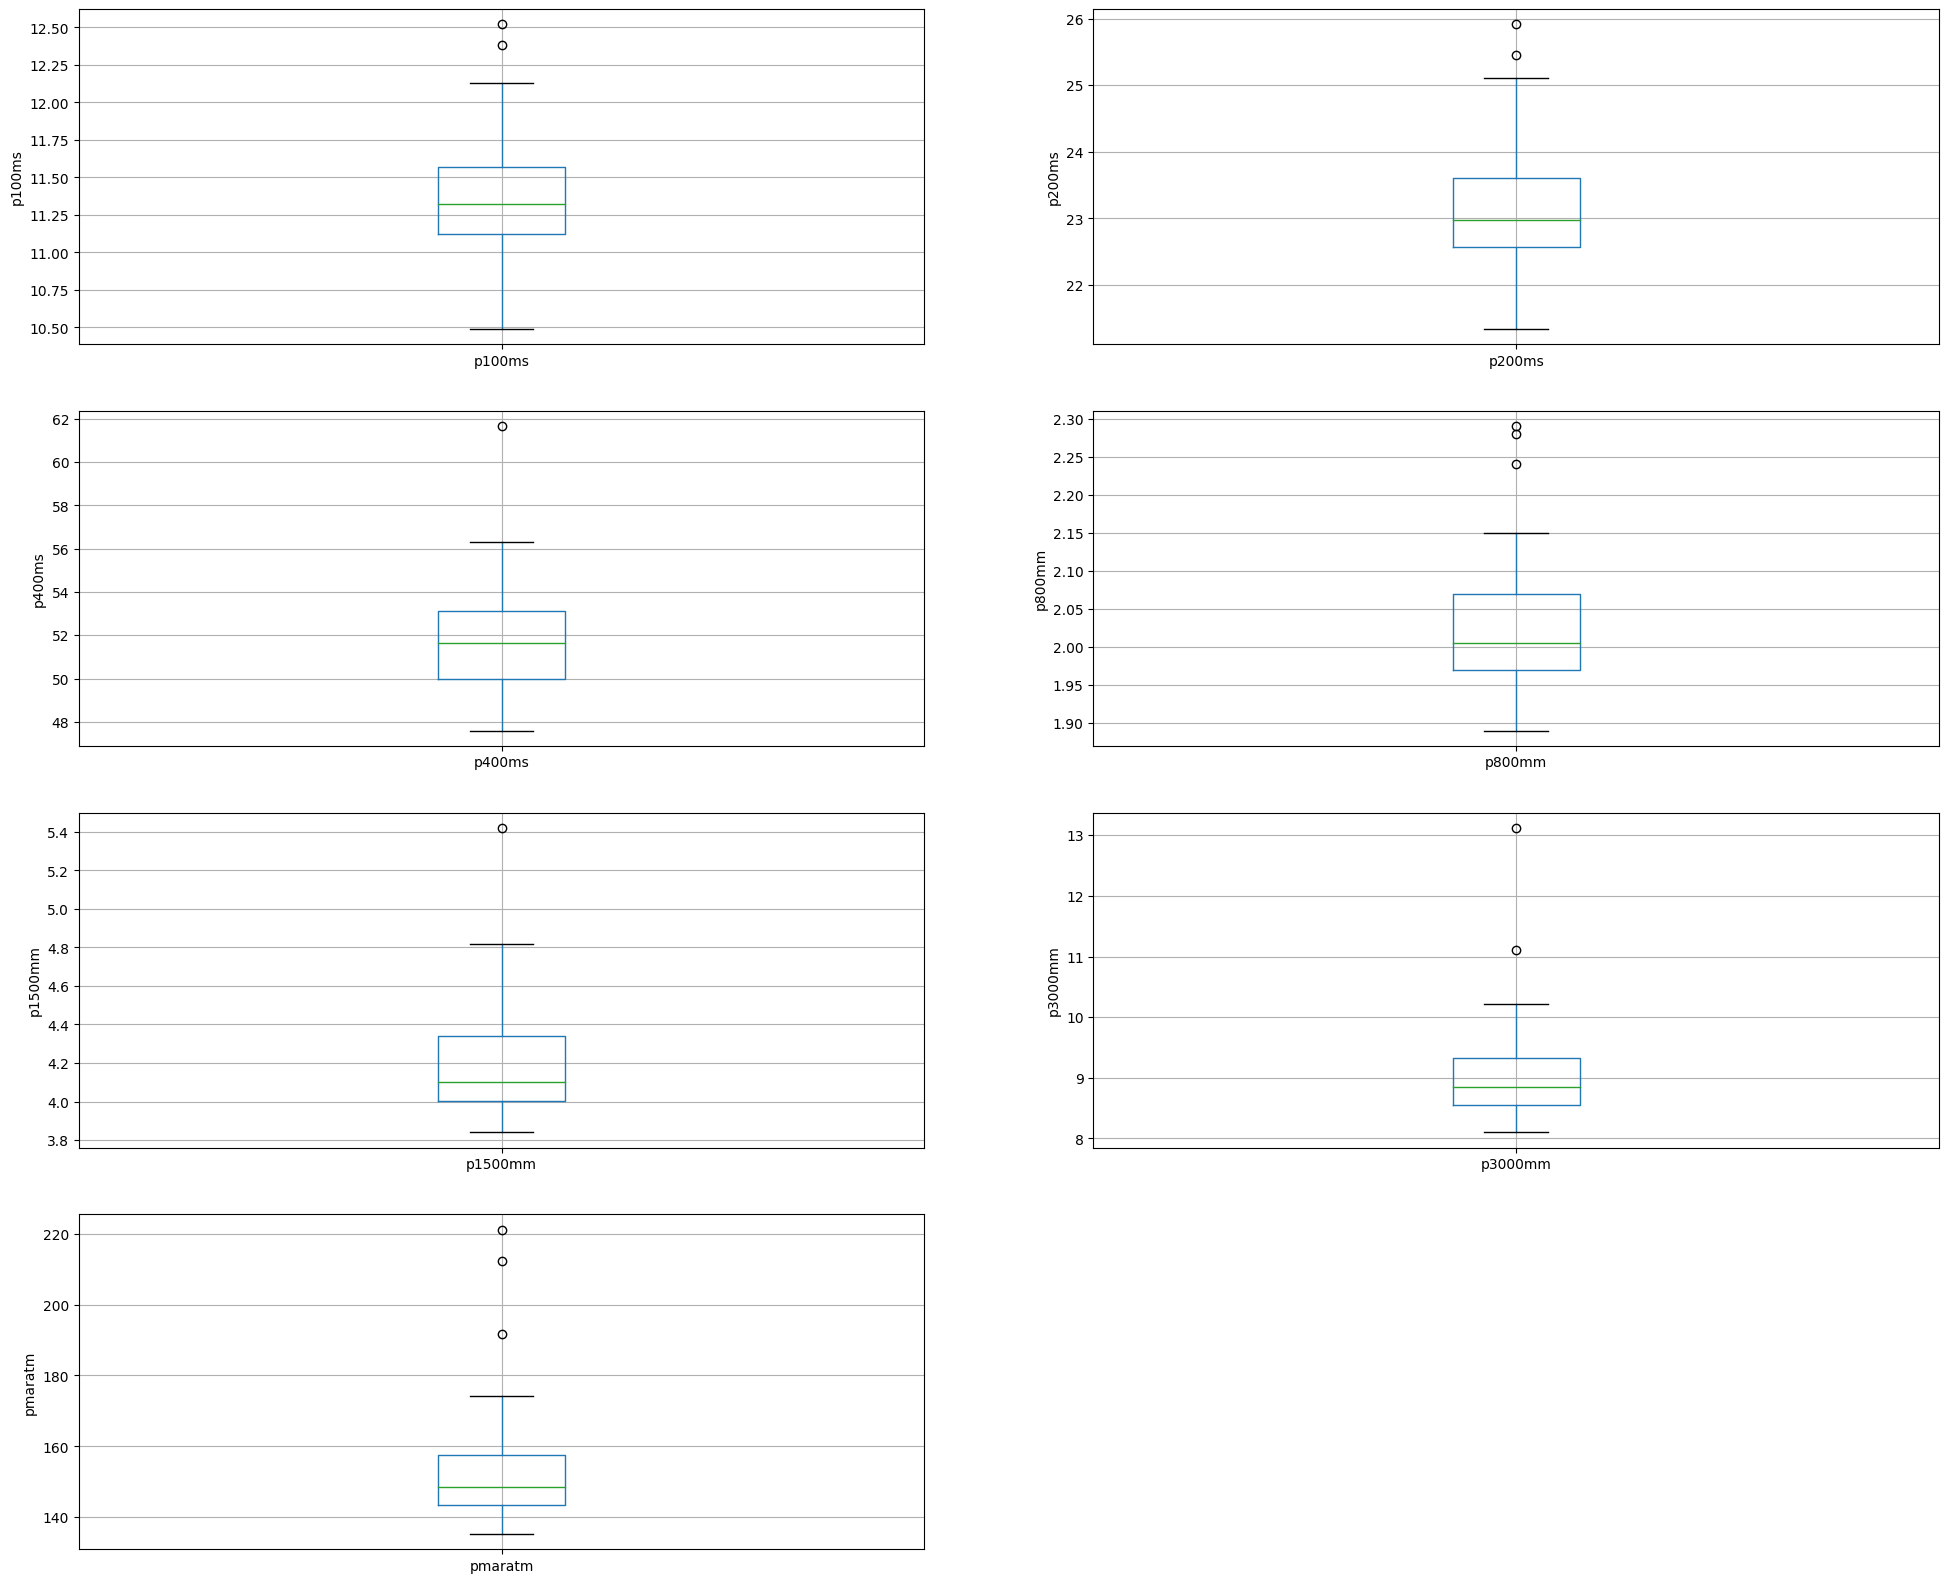

In [9]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados.boxplot(column='p100ms')
fig.set_title('')
fig.set_ylabel('p100ms')


plt.subplot(4, 2, 2)
fig = dados.boxplot(column='p200ms')
fig.set_title('')
fig.set_ylabel('p200ms')


plt.subplot(4, 2, 3)
fig = dados.boxplot(column='p400ms')
fig.set_title('')
fig.set_ylabel('p400ms')

plt.subplot(4, 2, 4)
fig = dados.boxplot(column='p800mm')
fig.set_title('')
fig.set_ylabel('p800mm')

plt.subplot(4, 2, 5)
fig = dados.boxplot(column='p1500mm')
fig.set_title('')
fig.set_ylabel('p1500mm')

plt.subplot(4, 2, 6)
fig = dados.boxplot(column='p3000mm')
fig.set_title('')
fig.set_ylabel('p3000mm')


plt.subplot(4, 2, 7)
fig = dados.boxplot(column='pmaratm')
fig.set_title('')
fig.set_ylabel('pmaratm')


In [10]:
# Excluindo outliers e selecionando somente as variáveis segmentadoras

aux = dados[dados['pmaratm'] < 180]

dados_semout = aux.drop(['PAIS'], axis=1)

dados_semout.describe()



,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,11.303137,22.987451,51.652157,2.007843,4.144510,8.939804,150.399804
std,0.326224,0.764214,2.142184,0.063853,0.186089,0.501017,9.325974
min,10.490000,21.340000,47.600000,1.890000,3.840000,8.100000,135.250000
25%,11.110000,22.520000,49.895000,1.965000,3.995000,8.535000,143.450000
50%,11.310000,22.920000,51.560000,2.000000,4.100000,8.810000,148.270000
75%,11.495000,23.365000,52.940000,2.060000,4.270000,9.250000,154.800000
max,12.130000,25.100000,56.230000,2.150000,4.540000,10.070000,174.180000


In [11]:
dados_semout.corr()


,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
p100ms,1.000000,0.908808,0.822025,0.694890,0.682289,0.593126,0.480142
p200ms,0.908808,1.000000,0.878632,0.707706,0.723509,0.607023,0.480022
p400ms,0.822025,0.878632,1.000000,0.737465,0.673253,0.607387,0.530104
p800mm,0.694890,0.707706,0.737465,1.000000,0.868839,0.813762,0.748180
p1500mm,0.682289,0.723509,0.673253,0.868839,1.000000,0.944559,0.777070
p3000mm,0.593126,0.607023,0.607387,0.813762,0.944559,1.000000,0.839591
pmaratm,0.480142,0.480022,0.530104,0.748180,0.777070,0.839591,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

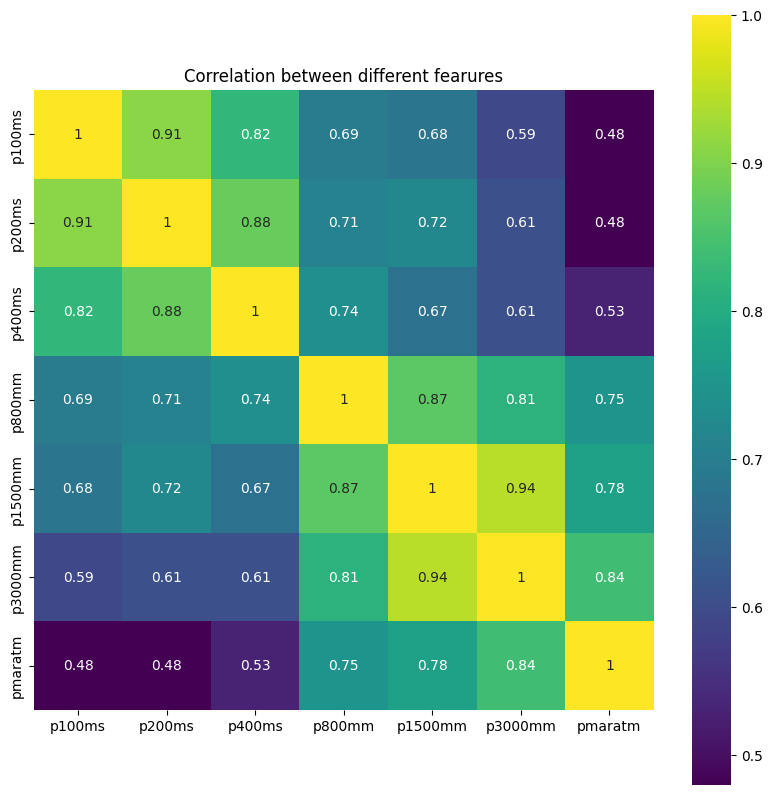

In [12]:
correlation = dados_semout.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [13]:
print(dados_semout)

    p100ms  p200ms  p400ms  p800mm  p1500mm  p3000mm  pmaratm
0    11.57   22.94   52.50    2.05     4.25     9.19   150.32
1    11.12   22.23   48.63    1.98     4.02     8.63   143.51
2    11.15   22.70   50.62    1.94     4.05     8.78   154.35
3    11.14   22.48   51.45    1.97     4.08     8.82   143.05
4    11.46   23.05   53.30    2.07     4.29     9.81   174.18
5    11.17   22.60   50.62    1.97     4.17     9.04   147.41
6    10.98   22.62   49.91    1.97     4.00     8.54   148.36
7    11.65   23.84   53.68    2.00     4.22     9.26   152.23
8    10.79   22.01   49.81    1.93     3.84     8.10   139.39
9    11.31   22.92   49.64    2.04     4.34     9.37   155.19
11   11.72   23.92   52.57    2.10     4.52     9.84   164.33
12   11.09   21.97   47.99    1.89     4.03     8.87   145.19
13   11.42   23.36   52.92    2.02     4.12     8.71   149.34
14   11.63   23.91   53.02    2.09     4.54     9.89   166.46
15   11.13   22.39   50.14    2.01     4.10     8.69   148.00
16   10.

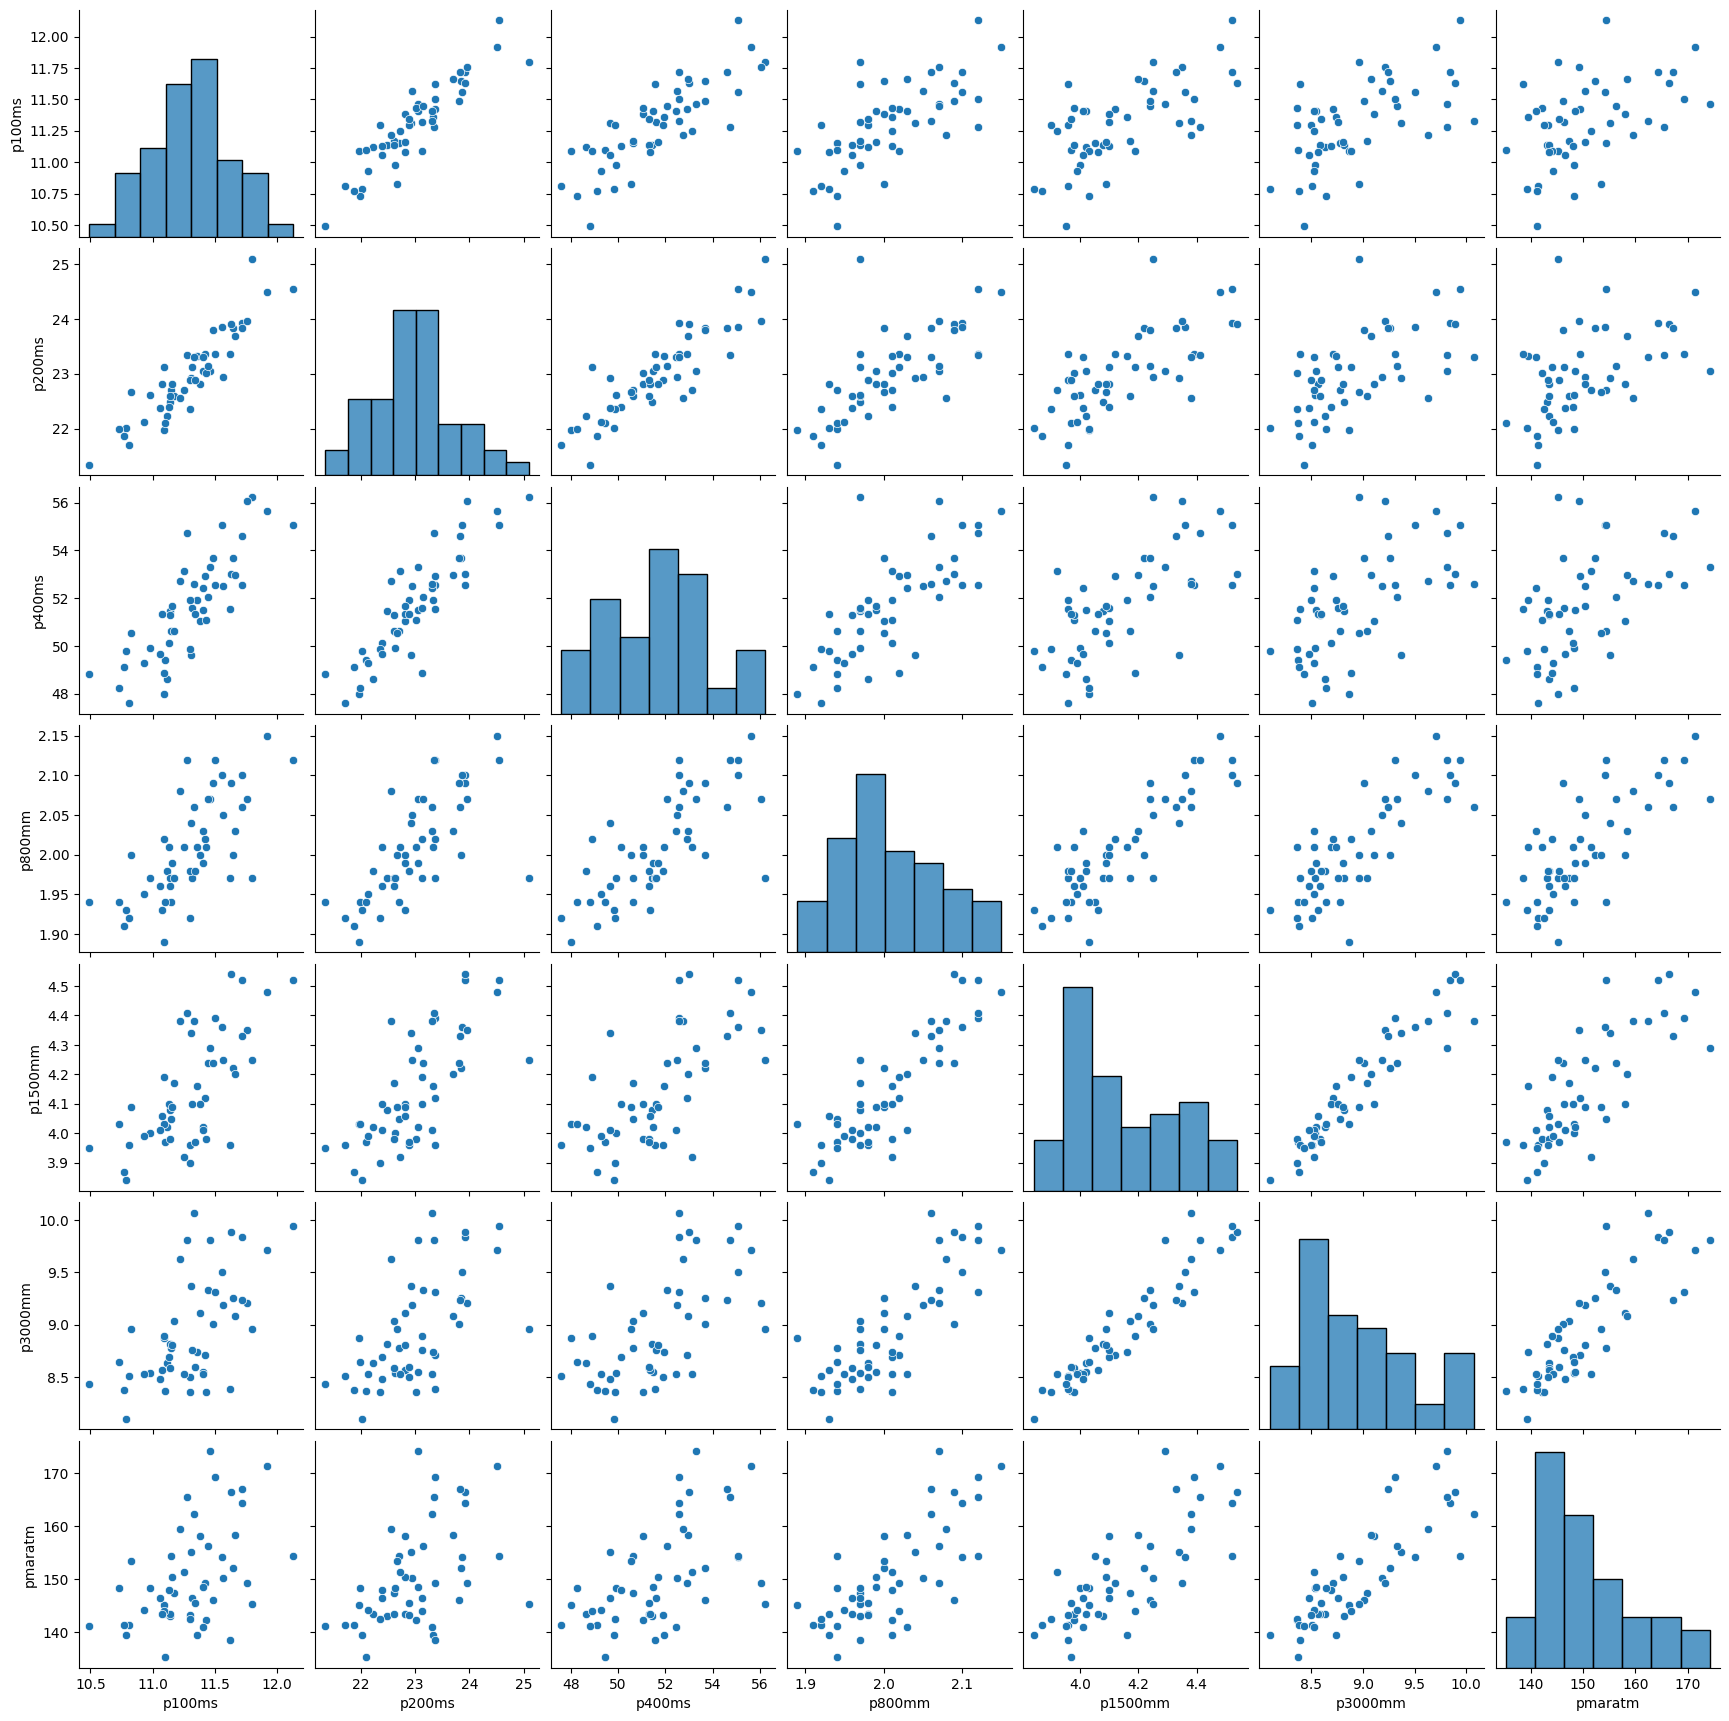

In [14]:
# Análise exploratória dos dados
#sb.pairplot()
sb.pairplot(dados_semout)

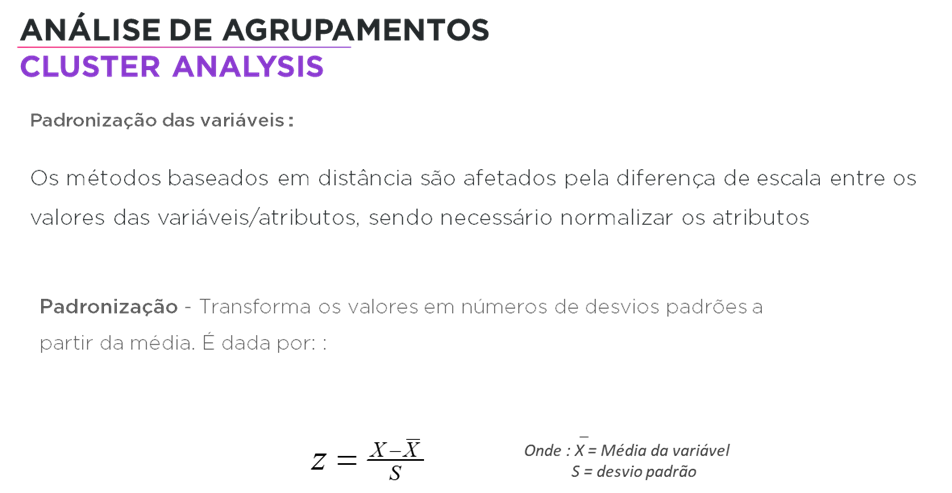

In [15]:
# feature Scaling
cols = dados_semout.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dados_scaled = scaler.fit_transform(dados_semout)

dados_scaled = pd.DataFrame(dados_scaled, columns=[cols])

dados_scaled.describe().round(2)

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-2.52,-2.18,-1.91,-1.86,-1.65,-1.69,-1.64
25%,-0.60,-0.62,-0.83,-0.68,-0.81,-0.82,-0.75
50%,0.02,-0.09,-0.04,-0.12,-0.24,-0.26,-0.23
75%,0.59,0.50,0.61,0.82,0.68,0.63,0.48
max,2.56,2.79,2.16,2.25,2.15,2.28,2.58


In [16]:
print(dados_scaled)

      p100ms    p200ms    p400ms    p800mm   p1500mm   p3000mm   pmaratm
0   0.826176 -0.062709  0.399723  0.666783  0.572520  0.504346 -0.008642
1  -0.566971 -1.001013 -1.424821 -0.440387 -0.675744 -0.624503 -0.746127
2  -0.474095 -0.379882 -0.486619 -1.073055 -0.512927 -0.322133  0.427784
3  -0.505054 -0.670624 -0.095309 -0.598554 -0.350110 -0.241501 -0.795942
4   0.485629  0.082662  0.776889  0.983117  0.789609  1.754142  2.575262
5  -0.412177 -0.512037 -0.486619 -0.598554  0.138341  0.201975 -0.323779
6  -1.000395 -0.485606 -0.821354 -0.598554 -0.784288 -0.805925 -0.220899
7   1.073846  1.126690  0.956043 -0.124053  0.409703  0.645452  0.198200
8  -1.588613 -1.291754 -0.868500 -1.231222 -1.652646 -1.692878 -1.192300
9   0.021246 -0.089140 -0.948648  0.508616  1.060971  0.867190  0.518751
10  1.290558  1.232414  0.432725  1.457618  2.037873  1.814616  1.508562
11 -0.659848 -1.344617 -1.726554 -1.863891 -0.621471 -0.140711 -0.564192
12  0.361793  0.492344  0.597735  0.192282 -0.13302

####     Tem que se tomar cuidado ao usar clusterização com dados que não foram padronizados. 
    Isto porque o K-means é muito sensível à escala dos dados porque utiliza a Distância Euclidiana para medir a distância. Por isso, sempre é importante aplicar o Scaling antes de usar o K-means. Outra desvantagem é que o K-Means pode ser bem lento com grande número de observações. Por isso, em alguns casos, utiliza-se uma amostra dos dados e não o conjunto inteiro por questões de performance. Clusterização pode ter resultado ruim se os dados tiverrem ruídos (overlapping) ou outliers. Um grande número de clusters (K) pode diminuir os erros, mas também pode ter maior risco de overfitting.

    Como vantagem, a clusterização não precisa de dados previamente classificados.





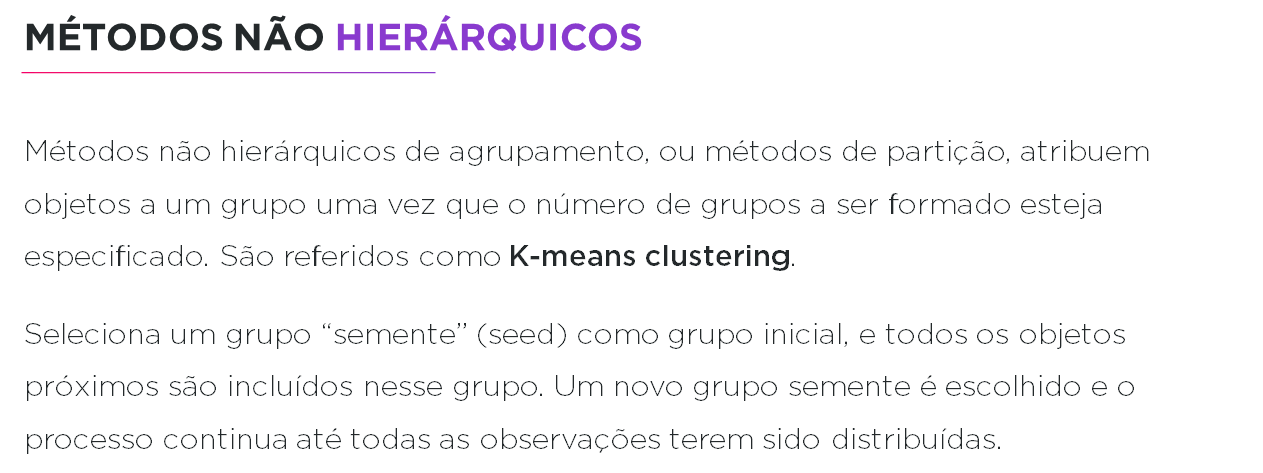

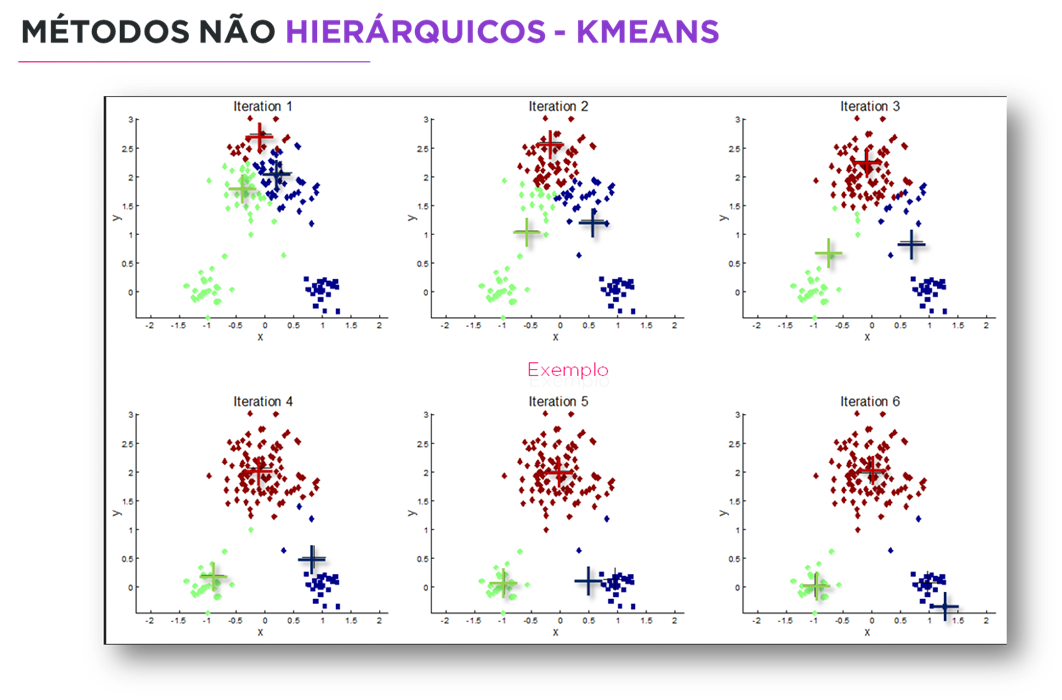

#### Como descobrir o número ideal de clusters?
    Um bom cluster tem uma baixa inertia_ (SSE) e também o menor número de clusters. Não queremos muitos clusters. A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. Este método testa a variância dos dados em relação ao número de clusters. O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. Chamamos de curva de cotovelo, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.
    O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.

    Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.

    É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

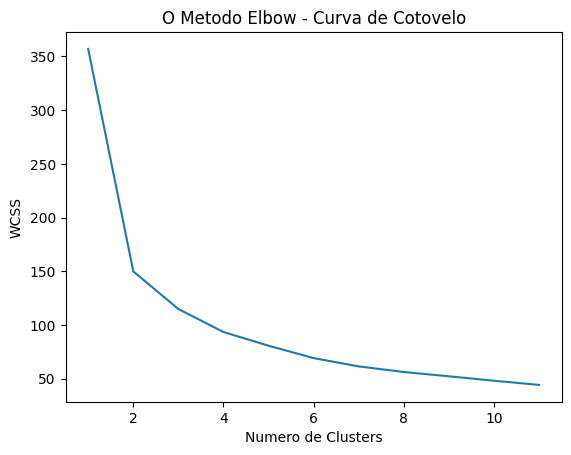

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans

 
#opção 1

wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dados_scaled)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 12), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# No código acima plotamos o somatório da variância dos dados em relação ao número de clusters
# para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

# É sempre bom lembrar que a escolha do parâmetro K é de extrema importância para a tarefa de agrupamento 
# e deve ser corretamente alinhado com as regras do negócio ou problema que esteja resolvendo

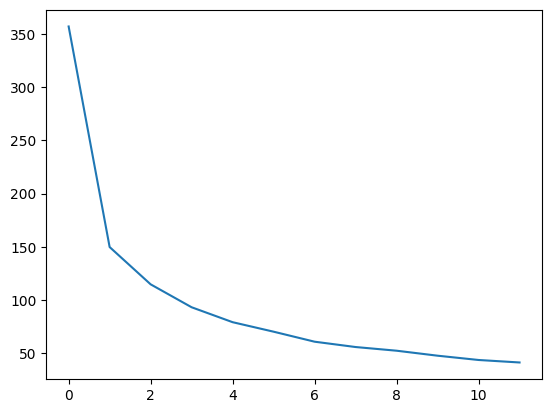

In [18]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters

#opção 2

# Elbow-curve/SSD

ssd = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8,9, 10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dados_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)



#### Silhueta
A silhueta é uma medida do quanto observações mais similares estão próximas entre si e, ao mesmo tempo, o quanto estão distantes de outros clusters diferentes. Busca maior coesão dentro do cluster e maior separação entre clusters. A silhueta vai de -1 a 1, onde o maior valor indica que a observação se encaixou mais dentro do cluster e se distanciou dos outros clusters. Se a silhueta for negativa, a configuração do cluster pode ter ou clusters de mais ou clusters de menos. A silhueta também usa a distância euclidiana para medir a distância entre as observações.
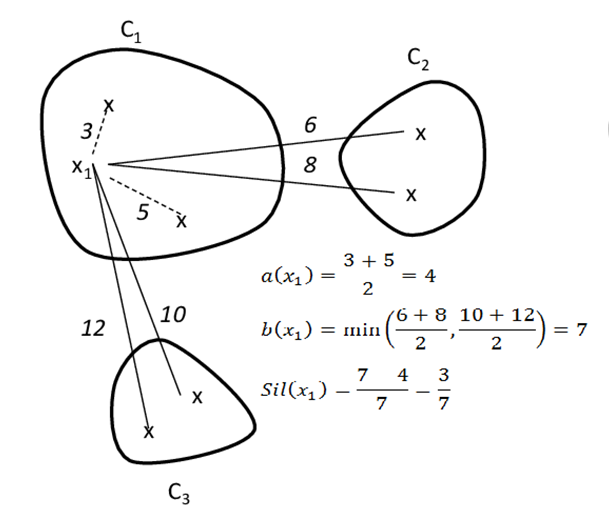

In [19]:
# Silhueta
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(dados_scaled)
    score = silhouette_score(dados_scaled, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.4818550043854238
Silhueta para 3 clusters : 0.3258615679083113
Silhueta para 4 clusters : 0.29090680181599327
Silhueta para 5 clusters : 0.27540209176533853
Silhueta para 6 clusters : 0.2415894205767779
Silhueta para 7 clusters : 0.24168358783596874
Silhueta para 8 clusters : 0.21206598181809885
Silhueta para 9 clusters : 0.21095566583562061
Silhueta para 10 clusters : 0.2033881422915951


In [20]:
dados_scaled.head()

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
0,0.826176,-0.062709,0.399723,0.666783,0.572520,0.504346,-0.008642
1,-0.566971,-1.001013,-1.424821,-0.440387,-0.675744,-0.624503,-0.746127
2,-0.474095,-0.379882,-0.486619,-1.073055,-0.512927,-0.322133,0.427784
3,-0.505054,-0.670624,-0.095309,-0.598554,-0.350110,-0.241501,-0.795942
4,0.485629,0.082662,0.776889,0.983117,0.789609,1.754142,2.575262


In [21]:
# k-means with some arbitrary k
# utilizar o método de inicialização random. Selecionar os centroides de forma aleatória.

# Modelo_Kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 0 ,init = 'random'  )

Modelo_Kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 0   )


# kmeans = KMeans(n_clusters=4, init = 'random', max_iter=100)

# declarado um objeto Modelo_K-means, agora iremos executar o método fit() para executar o algoritmo e agrupar os dados.
# O método fit() recebe como parâmetro os dados a serem agrupados, nesse caso será a base definida anteriormente.

# segmentos = Modelo_Kmeans.fit(dados_scaled)

Segmentos = Modelo_Kmeans.fit(dados_scaled)
Segmentos


KMeans(n_clusters=4, random_state=0)

In [22]:
Segmentos.cluster_centers_

array([[ 0.81929594,  0.86237888,  0.77846082,  0.47346753,  0.5483989 ,
         0.37219858,  0.10735299],
       [-1.16644682, -1.29535867, -1.27266844, -1.1593282 , -0.99644395,
        -0.92320818, -0.84349352],
       [-0.21249287, -0.15984327, -0.21105154, -0.35339492, -0.5156404 ,
        -0.50758663, -0.42026924],
       [ 0.88246445,  0.88040008,  1.01947601,  1.4144819 ,  1.48528194,
         1.54156686,  1.51978514]])

In [23]:
#A tabela de distâncias é criada de forma que em cada instância contém os valores de distância em relação a cada cluster.
distance = Modelo_Kmeans.fit_transform(dados_scaled)
distance

# Observe que cada instância contém quatro valores, e cada valor

# corresponde exatamente a distância entre a observaçãoe cada um dos quatro clusters.

# Verifique a coluna que apresenta a menor distância, significa o cluster que ele está mais próximo

array([[1.03351244, 4.10098488, 2.2089843 , 2.46593275],
       [3.78205134, 1.08976651, 1.56828256, 5.43617072],
       [2.98653914, 2.03813453, 1.21008091, 4.53248372],
       [2.83135837, 1.84746101, 0.81198555, 4.64074646],
       [3.00625362, 5.95526071, 4.37044307, 1.63767149],
       [2.55699067, 2.22232648, 1.11374841, 4.11619944],
       [3.47976412, 1.28367171, 1.16636603, 5.15206305],
       [0.79080907, 4.73785305, 2.70051953, 2.48493017],
       [5.18218074, 1.22123531, 2.76974286, 7.00373537],
       [2.28109776, 3.87901999, 2.56986711, 2.83067195],
       [2.77661461, 6.66469879, 4.85027899, 1.00828113],
       [4.56942943, 1.33880732, 2.51965715, 6.10157899],
       [1.29212586, 3.51351176, 1.39597467, 3.37686947],
       [2.90907092, 6.73770558, 4.94837001, 0.95399728],
       [2.91699707, 1.86479225, 1.00204985, 4.47651805],
       [4.68893928, 1.05126291, 2.50915709, 6.08853159],
       [5.27299638, 0.87340445, 2.94792119, 6.85745982],
       [4.42386164, 1.02505657,

In [24]:
# visualizando o atributo labels_ que nos retorna os labels para cada observação, ou seja,
# o código do cluster que para observação foi atribuído.
labels = Modelo_Kmeans.labels_
labels


# Só lembrando que a numeração dos clusters inicializa a partir do zero, com isso,
# podemos perceber que a primeira coluna da tabela corresponde aos valores de distâncias para o cluster 0, e assim por diante


array([0, 1, 2, 2, 3, 2, 2, 0, 1, 0, 3, 1, 0, 3, 2, 1, 1, 1, 2, 3, 2, 3,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 3, 3, 2, 0, 2, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 2, 2, 3, 3, 2, 1], dtype=int32)

In [25]:
dados_scaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (p100ms,)   51 non-null     float64
 1   (p200ms,)   51 non-null     float64
 2   (p400ms,)   51 non-null     float64
 3   (p800mm,)   51 non-null     float64
 4   (p1500mm,)  51 non-null     float64
 5   (p3000mm,)  51 non-null     float64
 6   (pmaratm,)  51 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [26]:
clusters = Modelo_Kmeans.fit_predict(dados_scaled)

In [27]:
from collections import Counter

Counter(clusters.tolist())


Counter({0: 9, 1: 11, 2: 20, 3: 11})

In [28]:
# assign the label

dados_scaled['Cluster_Id'] = labels
dados_scaled.head(54)

# A numeração dos clusters inicializa a partir do zero, com isso, podemos perceber que a primeira coluna da tabela 
# corresponde aos valores de distâncias para o cluster 0,assim por diante


,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm,Cluster_Id
0,0.826176,-0.062709,0.399723,0.666783,0.572520,0.504346,-0.008642,0
1,-0.566971,-1.001013,-1.424821,-0.440387,-0.675744,-0.624503,-0.746127,1
2,-0.474095,-0.379882,-0.486619,-1.073055,-0.512927,-0.322133,0.427784,2
3,-0.505054,-0.670624,-0.095309,-0.598554,-0.350110,-0.241501,-0.795942,2
4,0.485629,0.082662,0.776889,0.983117,0.789609,1.754142,2.575262,3
5,-0.412177,-0.512037,-0.486619,-0.598554,0.138341,0.201975,-0.323779,2
6,-1.000395,-0.485606,-0.821354,-0.598554,-0.784288,-0.805925,-0.220899,2
7,1.073846,1.126690,0.956043,-0.124053,0.409703,0.645452,0.198200,0
8,-1.588613,-1.291754,-0.868500,-1.231222,-1.652646,-1.692878,-1.192300,1
9,0.021246,-0.089140,-0.948648,0.508616,1.060971,0.867190,0.518751,0


In [29]:
# Box plot to visualize Cluster Id vs Frequency

In [30]:
dados_scaled.describe().round(3)

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm,Cluster_Id
count,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,1.647
std,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.016
min,-2.517,-2.177,-1.910,-1.864,-1.653,-1.693,-1.641,0.000
25%,-0.598,-0.618,-0.828,-0.678,-0.811,-0.816,-0.753,1.000
50%,0.021,-0.089,-0.043,-0.124,-0.242,-0.262,-0.231,2.000
75%,0.594,0.499,0.607,0.825,0.681,0.625,0.477,2.000
max,2.560,2.792,2.158,2.248,2.146,2.278,2.575,3.000


In [31]:
# Box plot to visualize Cluster Id vs Frequency


dados_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (p100ms,)      51 non-null     float64
 1   (p200ms,)      51 non-null     float64
 2   (p400ms,)      51 non-null     float64
 3   (p800mm,)      51 non-null     float64
 4   (p1500mm,)     51 non-null     float64
 5   (p3000mm,)     51 non-null     float64
 6   (pmaratm,)     51 non-null     float64
 7   (Cluster_Id,)  51 non-null     int32  
dtypes: float64(7), int32(1)
memory usage: 3.1 KB


Com o nosso modelo já criado podemos usar o algoritmo K-means para agrupar novos dados baseado nos centroides que já estão definidos.

O processo é extremamente simples..

neste caso, o que será feito é o cálculo de distância entre os novos dados e os centroides de nosso modelo, qual centroide apresentar a menor distância, será o cluster escolhido.

Não precisamos fazer estes cálculos a Scikit-Learn nos fornece essa funcionalidade através do método predict().

Vamos passar novos valores e observar os clusters que serão atribuídos.

In [32]:
data = [
        [ 11.4, 22.6, 33.7, 1.8, 2.2, 7.7, 120.5]
    ]

Modelo_Kmeans.predict(data)

NameError: name 'data1' is not defined

Hierarchical Clustering Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive Agglomerative.

Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Single linkage: 

mergings = linkage(dados_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

In [ ]:
# Complete linkage

mergings = linkage(dados_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
 
 
 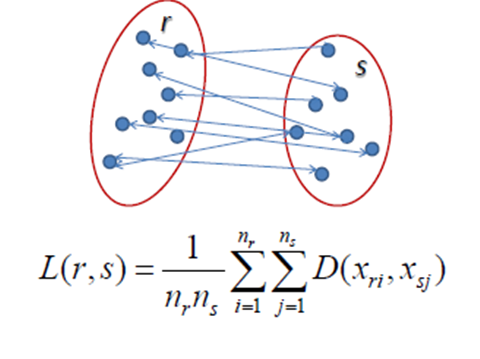

In [ ]:
# Average linkage

mergings = linkage(dados_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Cutting the Dendrogram based on K

# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

In [ ]:
# Assign cluster labels

dados_scaled['cluster_labels'] = cluster_labels


In [ ]:
dados_scaled.info()

In [ ]:
print(dados_scaled)